In [1]:
import pandas as pd 
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
import numpy as np 
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
import joblib

In [2]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")
df_gender = pd.read_csv("gender_submission.csv")
df_train
#df_test
df_gender

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [3]:
resultat = pd.merge(df_gender, df_test, on='PassengerId')
resultat

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
df_gender

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [5]:
df_train= df_train.drop(["Cabin","Name","Ticket"] ,axis =1)
resultat= resultat.drop(["Cabin","Name","Ticket"] ,axis =1)
#df_train
resultat

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.5,0,0,7.8292,Q
1,893,1,3,female,47.0,1,0,7.0000,S
2,894,0,2,male,62.0,0,0,9.6875,Q
3,895,0,3,male,27.0,0,0,8.6625,S
4,896,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,NaN,0,0,8.0500,S
414,1306,1,1,female,39.0,0,0,108.9000,C
415,1307,0,3,male,38.5,0,0,7.2500,S
416,1308,0,3,male,NaN,0,0,8.0500,S


In [6]:
df_train['Sex'] = df_train['Sex'].replace({'male': 0, 'female': 1})
resultat['Sex'] = resultat['Sex'].replace({'male': 0, 'female': 1})
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,S
887,888,1,1,1,19.0,0,0,30.0000,S
888,889,0,3,1,NaN,1,2,23.4500,S
889,890,1,1,0,26.0,0,0,30.0000,C


In [7]:
df_train['Embarked'] = df_train['Embarked'].replace({'Q': 0, 'S': 1,'C':2})
df_train = df_train.dropna()
resultat['Embarked'] = resultat['Embarked'].replace({'Q': 0, 'S': 1,'C':2})
resultat = resultat.dropna()
df_train


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,1.0
1,2,1,1,1,38.0,1,0,71.2833,2.0
2,3,1,3,1,26.0,0,0,7.9250,1.0
3,4,1,1,1,35.0,1,0,53.1000,1.0
4,5,0,3,0,35.0,0,0,8.0500,1.0
...,...,...,...,...,...,...,...,...,...
885,886,0,3,1,39.0,0,5,29.1250,0.0
886,887,0,2,0,27.0,0,0,13.0000,1.0
887,888,1,1,1,19.0,0,0,30.0000,1.0
889,890,1,1,0,26.0,0,0,30.0000,2.0


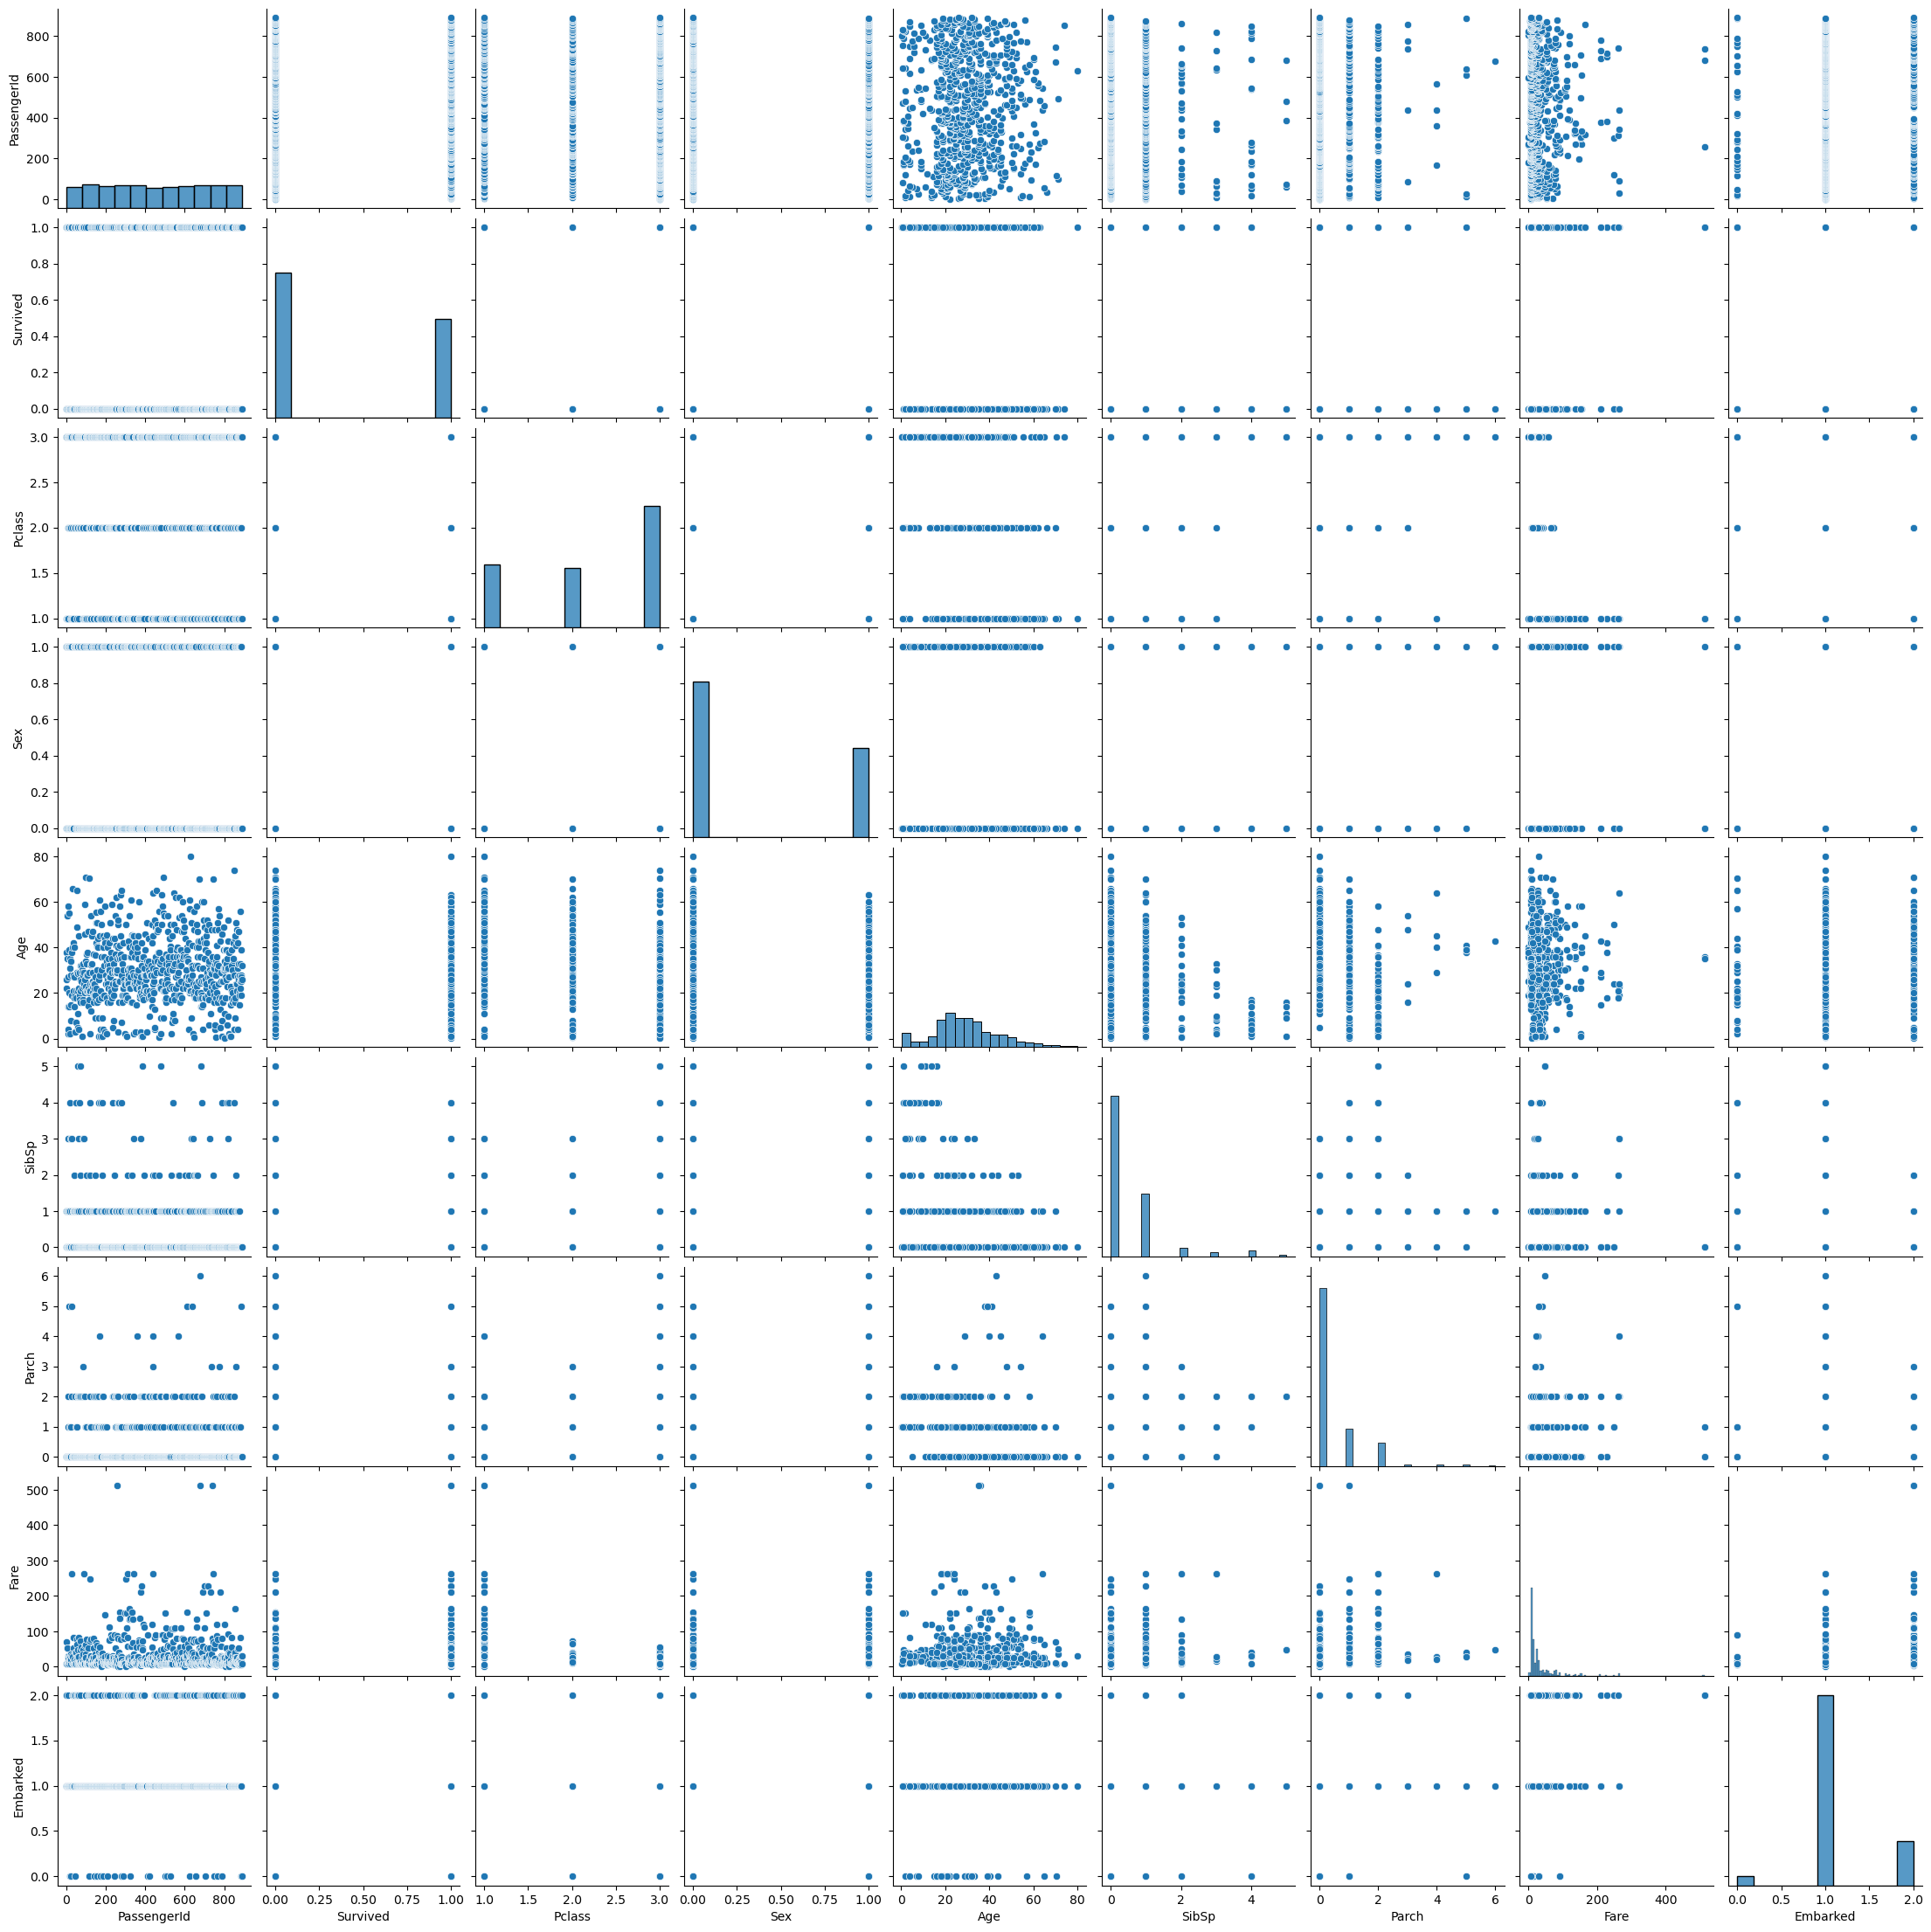

In [8]:
sns.pairplot(df_train)

In [9]:

X = df_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']]
y = df_train['Survived']
A = resultat[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']]
b = resultat['Survived']


C:\Users\Lucie\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lucie\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

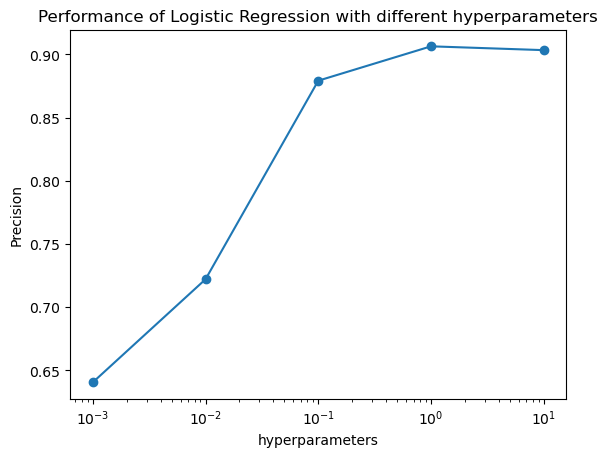

In [10]:
hyperparameters = [{'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}]


accuracies = []

for params in hyperparameters:
    model = LogisticRegression(**params)
    model.fit(X, y)
    y_pred = model.predict(A)
    accuracy = accuracy_score(b, y_pred)
    accuracies.append(accuracy)


hyperparam_values = [params['C'] for params in hyperparameters]

plt.plot(hyperparam_values, accuracies, marker='o')
plt.title('Performance of Logistic Regression with different hyperparameters')
plt.xlabel('hyperparameters')
plt.ylabel('Precision')
plt.xscale('log')  
plt.show()

In [11]:
model = LogisticRegression(C=1, penalty = 'l2', solver = 'lbfgs', max_iter=500)
model.fit(X, y)

LogisticRegression(C=1, max_iter=500)

In [12]:
predictions = model.predict(A)

In [13]:
accuracy = accuracy_score(b, predictions)
print(f"Précision du modèle : {accuracy}")

Précision du modèle : 0.9063444108761329


In [14]:
joblib.dump(model, 'model_titanic.pkl')

['model_titanic.pkl']